## 1. Downloading data

In [2]:
# Import necessary modules
import os  # Operating system module for file and directory operations
import tarfile  # Module for working with tar archives
import urllib.request  # Module for opening and reading URLs

# Define a function to fetch data
def fetch_data(data_url, data_path):
    os.makedirs(data_path, exist_ok=True) # Create the local directory if it doesn't exist
    tgz_path = os.path.join(data_path, "housing.tgz") # Construct the full path for the downloaded tar file
    urllib.request.urlretrieve(data_url, tgz_path) # Download the tar file from the specified URL and save it locally
    housing_tgz = tarfile.open(tgz_path) # Open the downloaded tar file
    housing_tgz.extractall(path=data_path) # Extract all contents from the tar file to the specified directory
    housing_tgz.close()  # Close the tar file

# Call the function to fetch housing data
if __name__=="__main__":
    data_PATH = os.path.join("datasets", "housing") # Define the local path where the dataset will be stored
    data_URL = "https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.tgz" # Define the complete URL of the dataset
    fetch_data(data_URL, data_PATH)

## 2. Loading and examining data

In [3]:
import pandas as pd

data_PATH = os.path.join("datasets", "housing") # Define the local path where the housing dataset will be stored

def load_data(housing_path=data_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

* __Take a quick look at the data (using head method)__

In [4]:
data = load_data()
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


* __Get a quick description of data (using info method)__

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


* __Finding out categories exist and the number of districts belong to each category (using the value_counts() method)__

In [6]:
data['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

* __Showing a summary of the numerical attributes ( using describe() method )__

In [7]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## 3. Visualizing the data

- __Histogram plot__

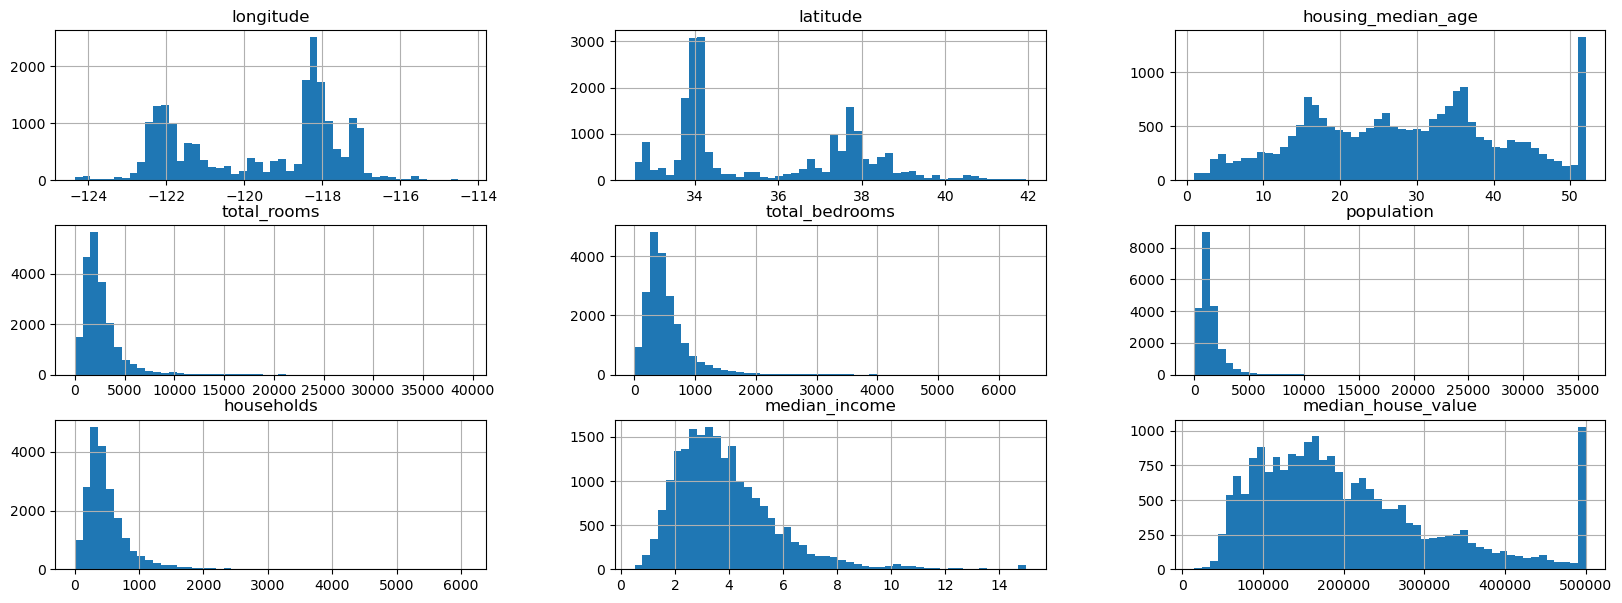

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
data.hist(bins=50, figsize=(20,7))
plt.show()

- __Scatter plot__

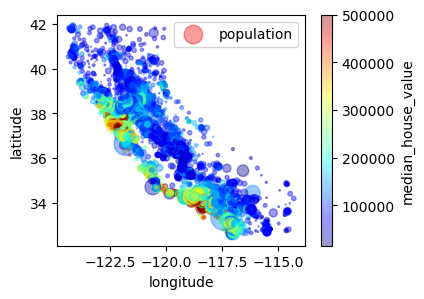

In [9]:
data.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
          s=data["population"] / 100, label="population", figsize=(4, 3),
          c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,)

plt.legend()
plt.show()

## 4. Splitting data

* __Basic data splitter based on randomness__

In [10]:
import numpy as np

np.random.seed(42) # to make this script's output identical at every run

def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data)) # Shuffle the indices randomly to create a random order
    test_set_size = int(len(data) * test_ratio) # Calculate the size of the test set based on the specified ratio
    test_indices = shuffled_indices[:test_set_size] # Select the first 'test_set_size' indices for the test set
    train_indices = shuffled_indices[test_set_size:] # Select the remaining indices for the training set
    return data.iloc[train_indices], data.iloc[test_indices] # Return the subsets of the data using the selected indices

if __name__ == "__main__":
    train_set, test_set = split_train_test(data, 0.2)
    print("The total number of train set = ",len(train_set))
    print("The total number of test set = ",len(test_set))

The total number of train set =  16512
The total number of test set =  4128


* __Accurate data splitter using unique identifiers__

In [11]:
import numpy as np
from zlib import crc32

def test_set_check(identifier, test_ratio):
    # Calculate CRC32 hash of the 64-bit integer representation of the identifier
    # and ensure it's a 32-bit unsigned integer using bitwise AND operation
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column] # Extract identifiers from the specified column in the dataset
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio)) # Apply the test_set_check function to each identifier
    return data.loc[~in_test_set], data.loc[in_test_set] # Return the training set (not in the test set) and the test set

if __name__ == "__main__":
    id = 'id'
    if id == 'index':
        data_with_id = data.reset_index()   # adds an `index` column
        train_set, test_set = split_train_test_by_id(data_with_id, 0.2, "index")
    elif id == 'id':
        data_with_id = data.copy()
        data_with_id["id"] = data["longitude"] * 1000 + data["latitude"]
        train_set, test_set = split_train_test_by_id(data_with_id, 0.2, "id")

    print("The total number of train set = ",len(train_set))
    print("The total number of test set = ",len(test_set))
    # print(train_set.head())

The total number of train set =  16322
The total number of test set =  4318


* __Simple data splitter using _sklearn.model_selection_ (purely random sampling methods)__

In [12]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN


* __Stratified splitter using _sklearn.model_selection_ (Stratified shuffle split of a dataset )__

    - Stratified split is ensuring that both your training and testing groups represent the different types in your data fairly. It's like making sure you don't have all the high earners in one group and low earners in the other.
    - In this example, the pd.cut() function in Pandas is utilized to convert continuous data into discrete intervals, commonly known as bins.
    - By employing this approach, we can guarantee that a reasonable proportion of data in each category is present in both the test and training sets, ensuring that the training and   test sets are representative of all categories.

    


In [13]:
# Create an income category attribute based on median income
data["income_cat"] = pd.cut(data["median_income"],
                           bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                           labels=[1, 2, 3, 4, 5])

## Plot a histogram of the income categories
# data["income_cat"].hist()


# Use StratifiedShuffleSplit to ensure proportional representation of income categories in train and test sets
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
# Split the data into training and testing sets based on income categories
for train_index, test_index in split.split(data, data["income_cat"]):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]


# Comparison of stratified versus purely random sampling
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(data),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

print(compare_props.head())


# Now you should remove the income_cat attribute of the data 
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

             Overall  Stratified    Random  Rand. %error  Strat. %error
income_cat                                                             
1           0.039826    0.039971  0.040213      0.973236       0.364964
2           0.318847    0.318798  0.324370      1.732260      -0.015195
3           0.350581    0.350533  0.358527      2.266446      -0.013820
4           0.176308    0.176357  0.167393     -5.056334       0.027480
5           0.114438    0.114341  0.109496     -4.318374      -0.084674


## 4. Looking for Correlations

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
Name: median_house_value, dtype: float64


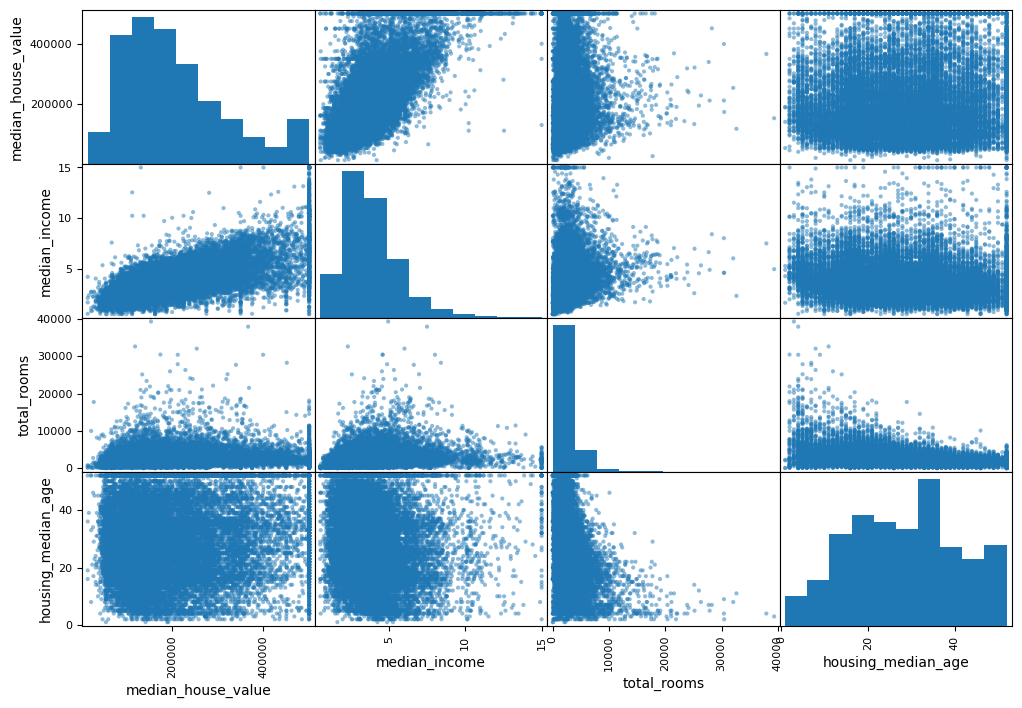

In [14]:
# Calculate the correlation matrix
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"] # Define the list of attributes for the scatter matrix
corr_matrix = data[attributes].corr() # Calculate the correlation matrix
sorted_correlations = corr_matrix["median_house_value"].sort_values(ascending=False) # Sort and display the correlations with respect to 'median_house_value' in descending order
print(sorted_correlations)

# Creating a scatter matrix using the scatter_matrix
from pandas.plotting import scatter_matrix # from pandas.tools.plotting import scatter_matrix 
scatter_matrix(data[attributes], figsize=(12, 8)) # Create a scatter matrix for the selected attributes with the specified figure size
plt.show()


## 5. Attribute Combinations

* __Advatages of attribute combination__
    * By combining attributes, we can generate new attributes that exhibit a higher correlation with the target variable.

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64


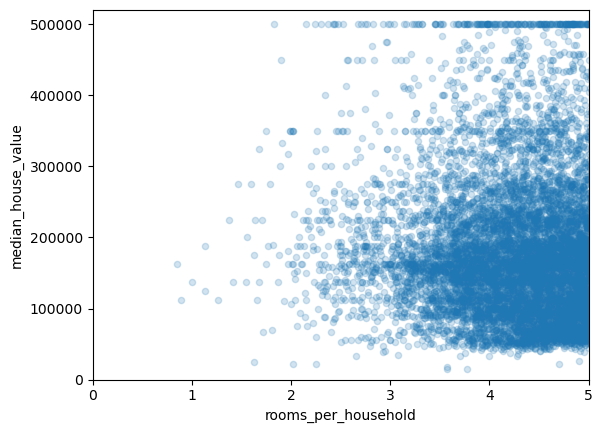

In [15]:
# Create new features based on existing data
data["rooms_per_household"] = data["total_rooms"]/data["households"]
data["bedrooms_per_room"] = data["total_bedrooms"]/data["total_rooms"]
data["population_per_household"] = data["population"]/data["households"]

# Calculate the correlation matrix for the selected attributes
attributes = ["median_house_value", "median_income", "total_rooms", "households", "total_bedrooms","population", "rooms_per_household","bedrooms_per_room", "population_per_household"] # Define the list of attributes for the scatter matrix
corr_matrix = data[attributes].corr()
print(corr_matrix["median_house_value"].sort_values(ascending=False))

# Create a scatter plot for 'rooms_per_household' vs. 'median_house_value'
data.plot(kind="scatter", x="rooms_per_household", y="median_house_value",alpha=0.2)
plt.axis([0, 5, 0, 520000])
plt.show()
# data.describe()

## 6. Pepare the Data for Machine Learning Algorithms

In [16]:
data = strat_train_set.drop("median_house_value", axis=1) # drop labels for training set
data_labels = strat_train_set["median_house_value"].copy()

## 7. Imputation
* In the context of data analysis and statistics, "impute" is commonly used to describe the process of estimating or filling in missing values in a dataset. When data is incomplete or contains gaps, imputation methods are applied to substitute reasonable values for the missing ones based on the available information.

In [17]:
# Selecting rows with at least one missing value and printing the resulting DataFrame with incomplete rows
sample_incomplete_rows = data[data.isnull().any(axis=1)].head()
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
1606,-122.08,37.88,26.0,2947.0,NaN,825.0,626.0,2.9330,NEAR BAY
10915,-117.87,33.73,45.0,2264.0,NaN,1970.0,499.0,3.4193,<1H OCEAN
19150,-122.70,38.35,14.0,2313.0,NaN,954.0,397.0,3.7813,<1H OCEAN
4186,-118.23,34.13,48.0,1308.0,NaN,835.0,294.0,4.2891,<1H OCEAN
16885,-122.40,37.58,26.0,3281.0,NaN,1145.0,480.0,6.3580,NEAR OCEAN


* __Imputation options__

In [18]:
# Imputation options
# sample_incomplete_rows.dropna(subset=["total_bedrooms"])    # option 1
# sample_incomplete_rows.drop("total_bedrooms", axis=1)       # option 2
median = data["total_bedrooms"].median()
sample_incomplete_rows["total_bedrooms"].fillna(median, inplace=True) # option 3
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
1606,-122.08,37.88,26.0,2947.0,433.0,825.0,626.0,2.9330,NEAR BAY
10915,-117.87,33.73,45.0,2264.0,433.0,1970.0,499.0,3.4193,<1H OCEAN
19150,-122.70,38.35,14.0,2313.0,433.0,954.0,397.0,3.7813,<1H OCEAN
4186,-118.23,34.13,48.0,1308.0,433.0,835.0,294.0,4.2891,<1H OCEAN
16885,-122.40,37.58,26.0,3281.0,433.0,1145.0,480.0,6.3580,NEAR OCEAN


* __Imputation using sklearn.impute__

In [19]:
# Remove the text attribute because median can only be calculated on numerical attributes:
data_num = data.drop("ocean_proximity", axis=1)

# Importing the SimpleImputer class from the scikit-learn library
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median") # Creating a SimpleImputer object with the strategy of filling missing values with the median
imputer.fit(data_num) # Fitting the imputer to the numerical part of the dataset
imputer.statistics_ # Obtaining the median values computed by the imputers
X = imputer.transform(data_num) # Transforming the original numerical data by filling in missing values with the median
data_tr = pd.DataFrame(X, columns=data_num.columns, index=data.index) # Creating a new DataFrame with the imputed numerical data, maintaining column names and indices

# Extracting rows with missing values from the transformed DataFrame
incomplete_rows_imputed = data_tr.loc[sample_incomplete_rows.index.values]

## 8. Handling Text and Categorical Attributes (Encoder)
  Most Machine Learning algorithms prefer to work with numbers, so let’s convert these categories from text to numbers


* __ordinal encoding:__ This encoding technique assigns a unique numerical value to each category, maintaining the order of the data

In [20]:
# Extracting the 'ocean_proximity' column from the DataFrame
housing_cat = data[["ocean_proximity"]]
housing_cat.head(10)

# Importing the OrdinalEncoder from scikit-learn
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder() # Creating an instance of the OrdinalEncoder
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat) # Transforming the categorical column 'ocean_proximity' into numerical values
housing_cat_encoded[:10] # Displaying the encoded values for the first 10 rows

# Displaying the mapping of categories to numerical values learned by the encoder
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

* __One-hot encoding:__  This is a technique used in data preprocessing to represent categorical variables as binary vectors. 

In [21]:
# Importing the OneHotEncoder from scikit-learn
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()# Creating an instance of the OneHotEncoder
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)# Transforming the categorical column 'ocean_proximity' into numerical values
housing_cat_1hot

# By default, the `OneHotEncoder` class returns a sparse array, but we can convert it to a dense array if needed by calling the `toarray()` method:
housing_cat_1hot.toarray()

# # Alternatively, you can set `sparse=False` when creating the `OneHotEncoder`:
# cat_encoder = OneHotEncoder(sparse=False)
# housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

## 9. Custom Transformers
* Let's create a custom transformer to add extra attributes:

In [22]:
from sklearn.base import BaseEstimator, TransformerMixin

# Defining the column names for specific attributes
col_names = ["total_rooms", "total_bedrooms", "population", "households"]
rooms_ix, bedrooms_ix, population_ix, households_ix = [
    data.columns.get_loc(c) for c in col_names] # get the column indices

# Creating a custom transformer class that adds additional attributes to the dataset
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

# Creating an instance of the custom transformer with a specific hyperparameter
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
# Applying the transformation to the dataset
housing_extra_attribs = attr_adder.transform(data.values)

# Recovering a DataFrame with the additional attributes
housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns=list(data.columns)+["rooms_per_household", "population_per_household"],
    index=data.index)
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND,5.485836,3.168555
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN,6.927083,2.623698
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.875,INLAND,5.393333,2.223333
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN,3.886128,1.859213
20496,-118.7,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN,6.096552,3.167241


## 10. Feature scaling
  It involves transforming the numerical features of a dataset to a specific scale or range. 

* __Min-Max Scaling (MinMaxScaler)__

In [23]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Example data
data_sample = np.array([[1.0, 2.0],
                 [3.0, 4.0],
                 [5.0, 6.0]])

# Instantiate MinMaxScaler with a custom feature_range
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit and transform the data
scaled_data = scaler.fit_transform(data_sample)

print("Original Data:\n", data_sample)
print("\nScaled Data:\n", scaled_data)

Original Data:
 [[1. 2.]
 [3. 4.]
 [5. 6.]]

Scaled Data:
 [[0.  0. ]
 [0.5 0.5]
 [1.  1. ]]


* __Standardization (Z-score normalization)__

In [24]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# Example data
data_sample = np.array([[1.0, 2.0],
                 [3.0, 4.0],
                 [5.0, 6.0]])

scaler = StandardScaler()
standardized_data = scaler.fit_transform(data_sample)
print("Original Data:\n", data_sample)
print("\nScaled Data:\n", standardized_data)

Original Data:
 [[1. 2.]
 [3. 4.]
 [5. 6.]]

Scaled Data:
 [[-1.22474487 -1.22474487]
 [ 0.          0.        ]
 [ 1.22474487  1.22474487]]


## 11. Transformation Pipelines
 In machine learning, a pipeline is a way to streamline a lot of the routine processes by putting together a sequence of data processing steps. 

* Now let's build a pipeline for preprocessing the __numerical attributes__:

In [25]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])
# data_num_tr = num_pipeline.fit_transform(data_num)
# data_num_tr

* Now let's build a pipeline for preprocessing the __numerical and categorial attributes__:

In [26]:
from sklearn.compose import ColumnTransformer

num_attribs = list(data_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

data_prepared = full_pipeline.fit_transform(data)

# Accessing the categorical encoder
cat_encoder = full_pipeline.named_transformers_['cat']
# Now you can access the properties or statistics of the categorical encoder
# For example, if it's a OneHotEncoder, you might want to check categories_:
categories = cat_encoder.categories_
categories_list=categories[0].tolist()

# Recovering a DataFrame with the additional attributes
data_prepared_pandas = pd.DataFrame(
    data_prepared,
    columns=list(data.columns)+["rooms_per_household", "population_per_household"]+categories_list,
    index=data.index)
data_prepared_pandas.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
12655,-0.941350,1.347438,0.027564,0.584777,0.640371,0.732602,0.556286,-0.893647,0.017395,0.006223,-0.121122,0.0,1.0,0.0,0.0,0.0
15502,1.171782,-1.192440,-1.722018,1.261467,0.781561,0.533612,0.721318,1.292168,0.569256,-0.040811,-0.810867,0.0,0.0,0.0,0.0,1.0
2908,0.267581,-0.125972,1.220460,-0.469773,-0.545138,-0.674675,-0.524407,-0.525434,-0.018024,-0.075371,-0.338273,0.0,1.0,0.0,0.0,0.0
14053,1.221738,-1.351474,-0.370069,-0.348652,-0.036367,-0.467617,-0.037297,-0.865929,-0.595140,-0.106803,0.961205,0.0,0.0,0.0,0.0,1.0
20496,0.437431,-0.635818,-0.131489,0.427179,0.272790,0.374060,0.220898,0.325752,0.251241,0.006109,-0.474513,1.0,0.0,0.0,0.0,0.0


## 12. Select and Train a Model

* ### Linear Regression 

In [27]:
# Import the LinearRegression model from scikit-learn
from sklearn.linear_model import LinearRegression

# Create an instance of the LinearRegression model
lin_reg = LinearRegression()
# Train the linear regression model using the prepared data and corresponding labels
lin_reg.fit(data_prepared, data_labels)

# Select a small subset of the data for testing (e.g., the first 5 instances)
some_data = data.iloc[:5]
some_labels = data_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

# Compare the model's predictions against the actual values:
print("Predictions:", lin_reg.predict(some_data_prepared))
print("Labels:", list(some_labels))

Predictions: [ 85657.90192014 305492.60737488 152056.46122456 186095.70946094
 244550.67966089]
Labels: [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


* Computing the __root mean squared error__

In [28]:
# Import the mean_squared_error function from scikit-learn metrics module
from sklearn.metrics import mean_squared_error

# Use the trained linear regression model (lin_reg) to make predictions on the training data
data_predictions = lin_reg.predict(data_prepared)

# Calculate the mean squared error (MSE) between the actual labels and the predicted values
lin_mse = mean_squared_error(data_labels, data_predictions)

# Calculate the square root of the mean squared error to get the root mean squared error (RMSE)
lin_rmse = np.sqrt(lin_mse)

* ### Decision Tree Regressor

In [29]:
# Import the DecisionTreeRegressor model from scikit-learn
from sklearn.tree import DecisionTreeRegressor

# Create an instance of the DecisionTreeRegressor with a fixed random state for reproducibility
tree_reg = DecisionTreeRegressor(random_state=42)
# Train the decision tree regression model using the prepared data and corresponding labels
tree_reg.fit(data_prepared, data_labels)

DecisionTreeRegressor(random_state=42)

* Computing the __root mean squared error__

In [30]:
housing_predictions = tree_reg.predict(data_prepared)
tree_mse = mean_squared_error(data_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

* ### K-fold cross-validation
  Scikit-Learn's KFold is a cross-validation technique that helps in assessing the performance and generalization of a machine learning model. 
K-fold cross-validation involves dividing the dataset into k subsets (folds) and then using each fold as a testing set while training the model on the remaining k-1 folds. 
This process is repeated k times, with each fold used as a testing set exactly once.


In [31]:
# Import necessary library for cross-validation
from sklearn.model_selection import cross_val_score

# Use cross_val_score to perform cross-validation on the decision tree model
# Parameters:
#   - tree_reg: Decision tree regression model to evaluate
#   - data_prepared: Feature matrix for training the model
#   - data_labels: Target variable (labels) to predict
#   - scoring="neg_mean_squared_error": Evaluation metric (negative mean squared error)
#   - cv=10: Number of folds in cross-validation (10-fold in this case)
scores = cross_val_score(tree_reg, data_prepared, data_labels,
                         scoring="neg_mean_squared_error", cv=10)

# Calculate root mean squared error (RMSE) from the negative mean squared error scores
tree_rmse_scores = np.sqrt(-scores)

# Function to display cross-validation scores along with mean and standard deviation
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

# Display the cross-validation scores for the decision tree model
display_scores(tree_rmse_scores)

Scores: [72831.45749112 69973.18438322 69528.56551415 72517.78229792
 69145.50006909 79094.74123727 68960.045444   73344.50225684
 69826.02473916 71077.09753998]
Mean: 71629.89009727491
Standard deviation: 2914.035468468928


In [32]:
# Assuming lin_reg is your Linear Regression model instance
# Perform cross-validation for the Linear Regression model using negative mean squared error
lin_scores = cross_val_score(lin_reg, data_prepared, data_labels,
                             scoring="neg_mean_squared_error", cv=10)

# Calculate root mean squared error (RMSE) from the negative mean squared error scores
lin_rmse_scores = np.sqrt(-lin_scores)

# Display the cross-validation scores for the Linear Regression model
display_scores(lin_rmse_scores)

Scores: [71762.76364394 64114.99166359 67771.17124356 68635.19072082
 66846.14089488 72528.03725385 73997.08050233 68802.33629334
 66443.28836884 70139.79923956]
Mean: 69104.07998247063
Standard deviation: 2880.3282098180675


* ### Ensemble methods
 Ensemble methods refer to techniques in machine learning where multiple models are combined to form a stronger, more robust predictive model than any of the individual models. 
* __RandomForestRegressor__

 Random Forest is indeed an example of Ensemble Learning, a technique where multiple models are trained and their predictions are combined to improve overall performance. In the case of Random Forests, it builds multiple Decision Trees during training and combines their outputs to make a final prediction.

In [33]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(data_prepared, data_labels)

housing_predictions = forest_reg.predict(data_prepared)
forest_mse = mean_squared_error(data_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, data_prepared, data_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

scores = cross_val_score(lin_reg, data_prepared, data_labels, scoring="neg_mean_squared_error", cv=10)
pd.Series(np.sqrt(-scores)).describe()

Scores: [51559.63379638 48737.57100062 47210.51269766 51875.21247297
 47577.50470123 51863.27467888 52746.34645573 50065.1762751
 48664.66818196 54055.90894609]
Mean: 50435.58092066179
Standard deviation: 2203.3381412764606


count       10.000000
mean     69104.079982
std       3036.132517
min      64114.991664
25%      67077.398482
50%      68718.763507
75%      71357.022543
max      73997.080502
dtype: float64

* ### Save and load models

In [34]:
# Import necessary libraries
from joblib import dump, load

# Save the trained model to a file
dump(lin_reg, 'linear_model.joblib')

# To load the model back later
loaded_linear_model = load('linear_model.joblib')

# Now you can use loaded_linear_model for predictions or further analysis

## 13. Fine-Tune Your Model

* ### Grid Search
Scikit-Learn's GridSearchCV is a powerful tool for hyperparameter tuning in machine learning models. 

In [36]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(data_prepared, data_labels)


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [38]:
# Print the best parameters found during the grid search
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [39]:
# 'best_estimator_' contains the best model trained with the optimal hyperparameters found
# during the grid search. It is ready to be used for making predictions on new, unseen data.
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30, random_state=42)

In [46]:
# Access the cross-validation results from the grid search
cvres = grid_search.cv_results_
# Print mean scores and corresponding hyperparameter values during the grid search
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    # The mean_test_score is the negative mean squared error (or another scoring metric) during cross-validation.
    # By taking the square root and negating it, we get the root mean squared error (RMSE) in a readable form.
    print("Root Mean Squared Error:", np.sqrt(-mean_score), "| Hyperparameters:", params)

Root Mean Squared Error: 63895.161577951665 | Hyperparameters: {'max_features': 2, 'n_estimators': 3}
Root Mean Squared Error: 54916.32386349543 | Hyperparameters: {'max_features': 2, 'n_estimators': 10}
Root Mean Squared Error: 52885.86715332332 | Hyperparameters: {'max_features': 2, 'n_estimators': 30}
Root Mean Squared Error: 60075.3680329983 | Hyperparameters: {'max_features': 4, 'n_estimators': 3}
Root Mean Squared Error: 52495.01284985185 | Hyperparameters: {'max_features': 4, 'n_estimators': 10}
Root Mean Squared Error: 50187.24324926565 | Hyperparameters: {'max_features': 4, 'n_estimators': 30}
Root Mean Squared Error: 58064.73529982314 | Hyperparameters: {'max_features': 6, 'n_estimators': 3}
Root Mean Squared Error: 51519.32062366315 | Hyperparameters: {'max_features': 6, 'n_estimators': 10}
Root Mean Squared Error: 49969.80441627874 | Hyperparameters: {'max_features': 6, 'n_estimators': 30}
Root Mean Squared Error: 58895.824998155826 | Hyperparameters: {'max_features': 8, 'n

In [51]:
# Create a DataFrame with the complete cross-validation results
cv_results_df = pd.DataFrame(grid_search.cv_results_)
cv_results_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.071470,0.000652,0.002351,0.000400,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-4.119912e+09,-3.723465e+09,...,-4.082592e+09,1.867375e+08,18,-1.155630e+09,-1.089726e+09,-1.153843e+09,-1.118149e+09,-1.093446e+09,-1.122159e+09,2.834288e+07
1,0.236960,0.003046,0.006730,0.000614,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-2.973521e+09,-2.810319e+09,...,-3.015803e+09,1.139808e+08,11,-5.982947e+08,-5.904781e+08,-6.123850e+08,-5.727681e+08,-5.905210e+08,-5.928894e+08,1.284978e+07
2,0.713133,0.008119,0.018003,0.001164,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-2.801229e+09,-2.671474e+09,...,-2.796915e+09,7.980892e+07,9,-4.412567e+08,-4.326398e+08,-4.553722e+08,-4.320746e+08,-4.311606e+08,-4.385008e+08,9.184397e+06
3,0.118693,0.001273,0.002674,0.000661,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-3.528743e+09,-3.490303e+09,...,-3.609050e+09,1.375683e+08,16,-9.782368e+08,-9.806455e+08,-1.003780e+09,-1.016515e+09,-1.011270e+09,-9.980896e+08,1.577372e+07
4,0.384261,0.002626,0.006573,0.000560,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-2.742620e+09,-2.609311e+09,...,-2.755726e+09,1.182604e+08,7,-5.063215e+08,-5.257983e+08,-5.081984e+08,-5.174405e+08,-5.282066e+08,-5.171931e+08,8.882622e+06
5,1.145679,0.004762,0.019061,0.000523,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-2.522176e+09,-2.440241e+09,...,-2.518759e+09,8.488084e+07,3,-3.776568e+08,-3.902106e+08,-3.885042e+08,-3.830866e+08,-3.894779e+08,-3.857872e+08,4.774229e+06
6,0.155176,0.002488,0.002433,0.000482,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-3.362127e+09,-3.311863e+09,...,-3.371513e+09,1.378086e+08,13,-8.909397e+08,-9.583733e+08,-9.000201e+08,-8.964731e+08,-9.151927e+08,-9.121998e+08,2.444837e+07
7,0.519744,0.005196,0.006975,0.000336,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-2.622099e+09,-2.669655e+09,...,-2.654240e+09,6.967978e+07,5,-4.939906e+08,-5.145996e+08,-5.023512e+08,-4.959467e+08,-5.147087e+08,-5.043194e+08,8.880106e+06
8,1.589557,0.008375,0.019106,0.000351,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-2.446142e+09,-2.446594e+09,...,-2.496981e+09,7.357046e+07,2,-3.760968e+08,-3.876636e+08,-3.875307e+08,-3.760938e+08,-3.861056e+08,-3.826981e+08,5.418747e+06
9,0.205977,0.005241,0.002311,0.000739,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-3.590333e+09,-3.232664e+09,...,-3.468718e+09,1.293758e+08,14,-9.505012e+08,-9.166119e+08,-9.033910e+08,-9.070642e+08,-9.459386e+08,-9.247014e+08,1.973471e+07


* ### Randomized Search

In [50]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(data_prepared, data_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000018A5BE538D0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000018A5BE53790>},
                   random_state=42, scoring='neg_mean_squared_error')

* ### Evaluate Your System on the Test Set

In [52]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

final_rmse

47873.26095812988

* We can compute a 95% confidence interval for the test RMSE:

In [53]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([45893.36082829, 49774.46796717])